In [24]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [25]:
## Load the dataset
df = pd.read_csv('creditcard.csv')

In [26]:
## Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [27]:
## Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


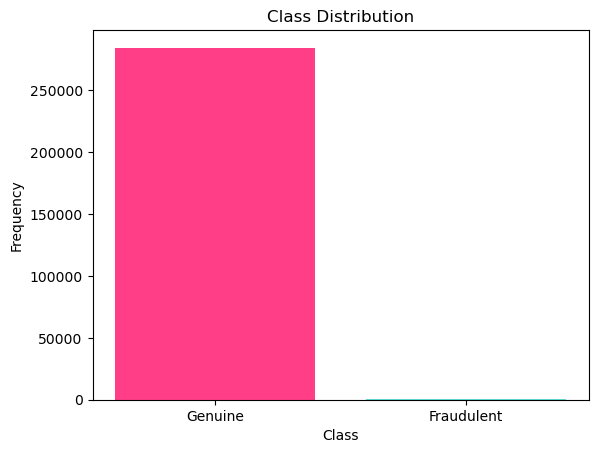

In [32]:
## Visualize the class distribution
counts = df['Class'].value_counts()
plt.bar(counts.index, counts.values, color=['#FF3E87', '#64E0D5'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(2), ['Genuine', 'Fraudulent'])
plt.show()

In [33]:
## Normalize the amount column
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)

In [34]:
## Prepare the data for training
X = df.drop('Class', axis=1)
y = df['Class']

In [35]:
## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
## Compute class weights for handling class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [37]:
## Train a classification model with class weights
## Logistic Regression
lr = LogisticRegression(class_weight=class_weights_dict)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [38]:
## Random Forests
rf = RandomForestClassifier(class_weight=class_weights_dict)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [40]:
## Evaluate the model's performance
## Logistic Regression
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



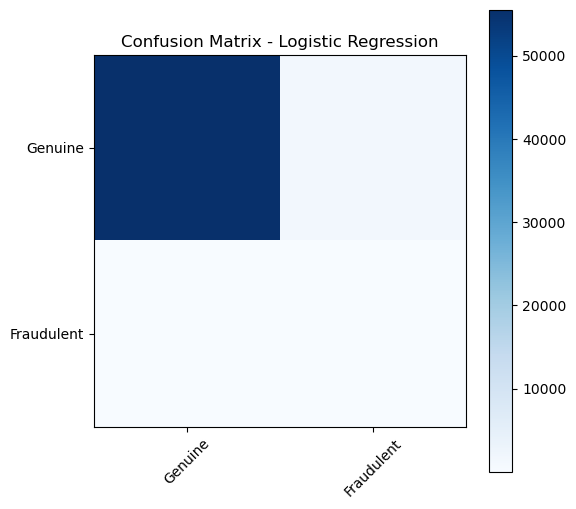

In [41]:
## Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_lr, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
labels = ['Genuine', 'Fraudulent']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.show()

In [42]:
## Random Forests
print('Random Forests Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forests Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



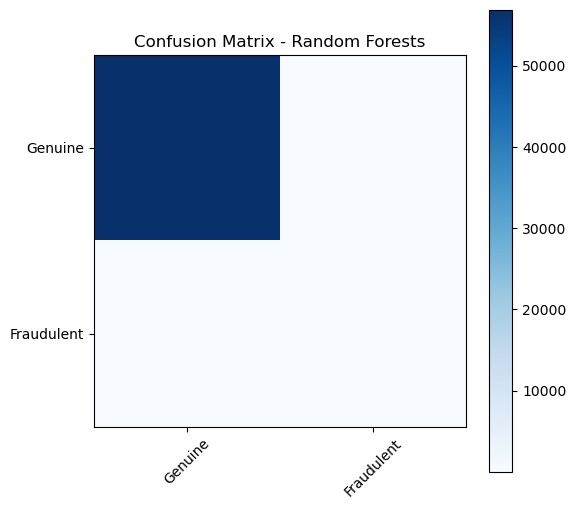

In [43]:
## Confusion Matrix for Random Forests
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forests')
plt.colorbar()
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.show()